In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Markdown as md
%matplotlib inline
#sns.set(rc={"figure.figsize":(20, 20)})

Load source and review data

In [5]:
    df = pd.read_csv("../sources/raw/dataset_SCL.csv", dtype={'Vlo-O':str, 'Vlo-I':str})
    df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


An easy way to check the null is get the information from the data frame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


We only have one column, `Vlo-I` as we can see in the description above

# Fecha-I

---
First field is the Fecha-I, this field has the date and the hour, so we are going to split it in two to review the distribution of the programated date, the main idea is to detect the distribution over the date

In [7]:
DATE = 'Date'
TIME = 'time'
HOUR = 'hour'
MINUTE = 'minute'

In [8]:
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])

In [9]:
df[DATE] = df['Fecha-I'].dt.date
df[TIME] = df['Fecha-I'].dt.time
df[HOUR] = df['Fecha-I'].dt.hour
df[MINUTE] = df['Fecha-I'].dt.minute

In [10]:
md(f"Number of days on the dataframe {df[DATE].nunique()}")


Number of days on the dataframe 365

In the following image, we can see that we only have information of one year, thus the lowest demand is between mars to july. A reason could be is the seasonality, in the south pole is winter. However, there is increse in the second semester due the summer season

In [24]:
to_plot = df.groupby([DATE])[DATE].count().rename("count")
to_plot = to_plot.reset_index()

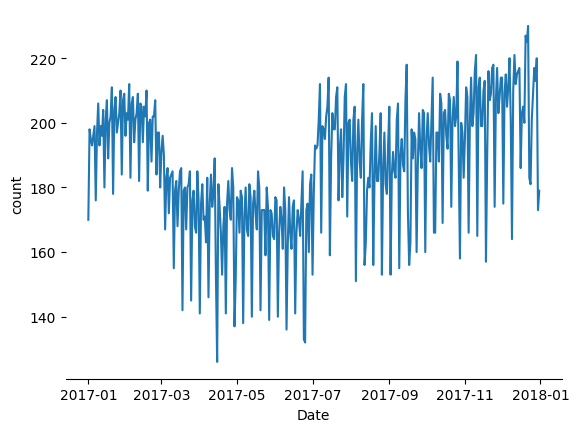

In [25]:
sns.lineplot(x=DATE, y = 'count', data = to_plot, palette = sns.color_palette("Set2",1))
sns.despine(left=True)

During this year, we have a record, that at least one fly can is register every hour, but in the distribution we can see preference, such as 1:00, 6:00, 8:00, and 17:00 hours

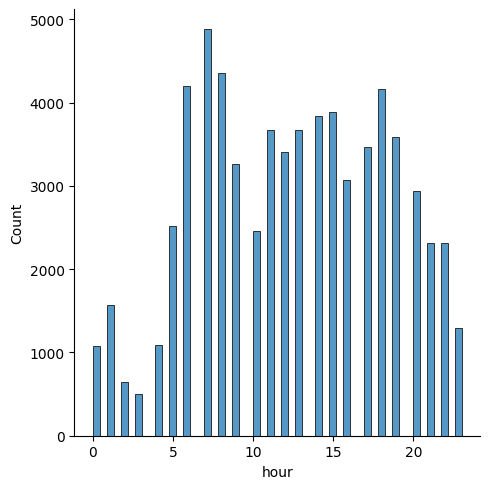

In [13]:
sns.displot(df[HOUR], palette = sns.color_palette("Set2",2))

## Destination-i
Destination programmaded

In [14]:
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Date,time,hour,minute
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,2017-01-01,23:30:00,23,30
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,2017-01-02,23:30:00,23,30
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,2017-01-03,23:30:00,23,30
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,2017-01-04,23:30:00,23,30
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,2017-01-05,23:30:00,23,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,2017-12-22,14:55:00,14,55
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,2017,Lunes,I,JetSmart SPA,Santiago,Lima,2017-12-25,14:55:00,14,55
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,2017-12-27,14:55:00,14,55
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,2017-12-29,14:55:00,14,55


In [15]:
df['Des-I'].value_counts().sort_values(ascending=False).head(5)

SCFA    5787
SPJC    5270
SCCF    5145
SCTE    4357
SCIE    3995
Name: Des-I, dtype: int64

In [16]:
top_destination = df['Des-I'].value_counts().sort_values(ascending=False).head(2).index.tolist()

In [17]:
to_plot = df.groupby([DATE, 'TIPOVUELO'])['TIPOVUELO'].count().rename("count")
to_plot = to_plot.reset_index()


In [18]:
to_plot.Date.nunique()

365

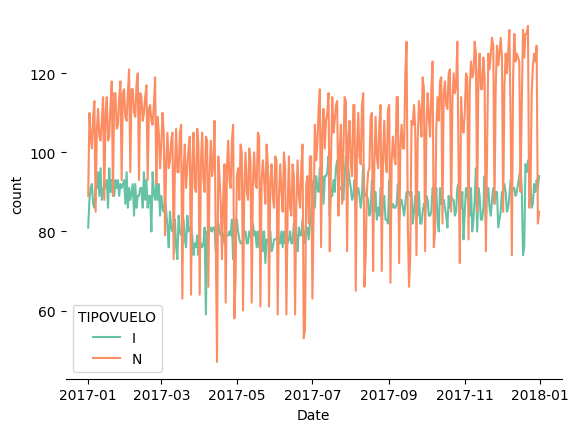

In [19]:
sns.lineplot(x=DATE, y = 'count', data = to_plot, hue='TIPOVUELO', palette = sns.color_palette("Set2",2))# palette = sns.color_palette("Paired",1))
sns.despine(left=True)

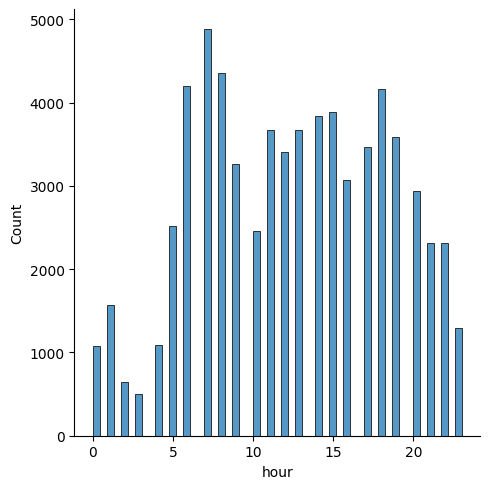

In [20]:
sns.displot(df[HOUR], palette = sns.color_palette("Set2",2))

In [21]:
to_plot = df.groupby([DATE, 'TIPOVUELO'])['TIPOVUELO'].count().rename("count")
to_plot = to_plot.reset_index()

In [22]:
to_plot

,Date,TIPOVUELO,count
0,2017-01-01,I,81
1,2017-01-01,N,89
2,2017-01-02,I,88
3,2017-01-02,N,110
4,2017-01-03,I,91
...,...,...,...
725,2017-12-29,N,127
726,2017-12-30,I,91
727,2017-12-30,N,82
728,2017-12-31,I,94


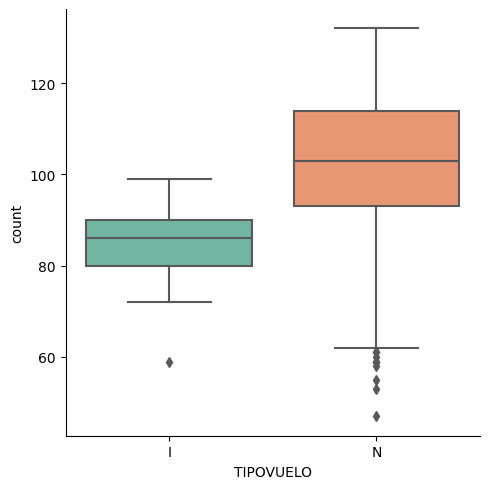

In [23]:

bar = sns.catplot(x="TIPOVUELO", y="count",# hue="Churn",
            kind="box",data=to_plot, palette = sns.color_palette("Set2",2))